Dataset carregado:
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

Exemplo de texto pré-processado:
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset 

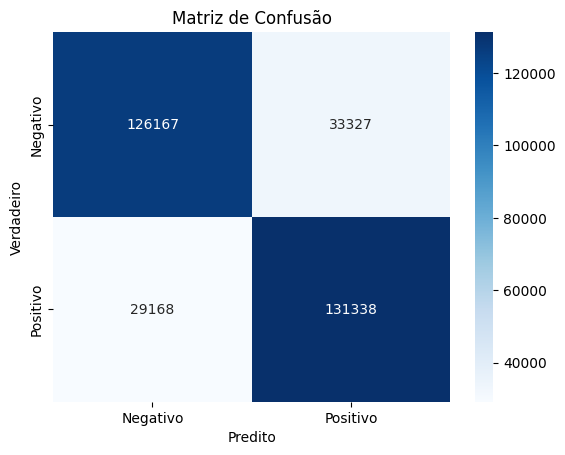

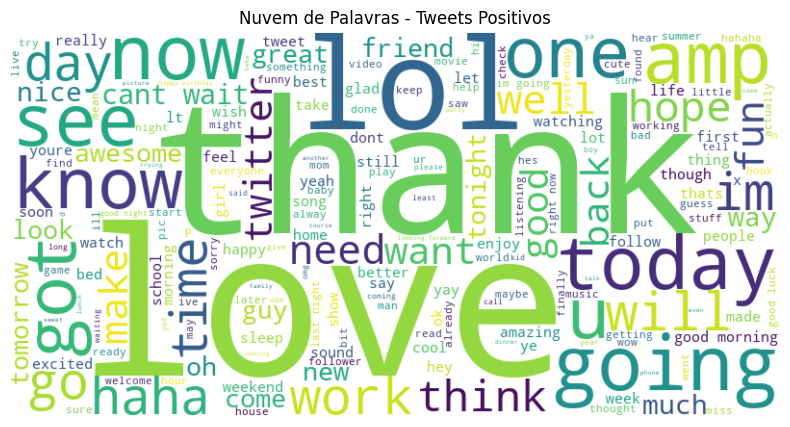

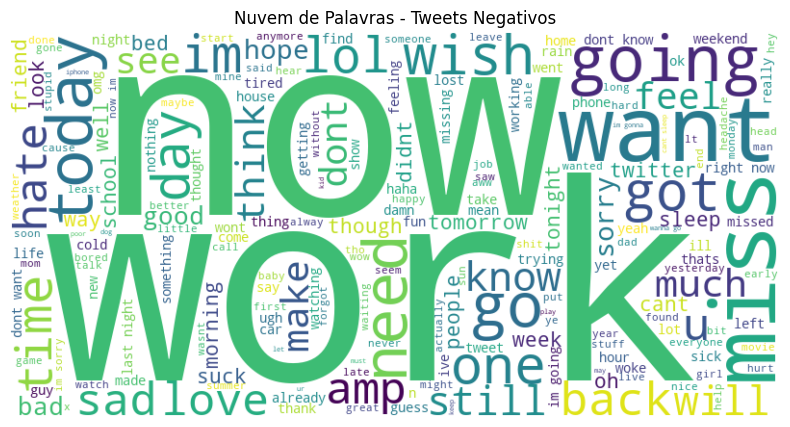

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. Carregar dados (exemplo com Sentiment140)
# Dataset disponível em https://www.kaggle.com/kazanova/sentiment140
# Suponha que o arquivo está local: 'training.1600000.processed.noemoticon.csv'
# Colunas: [target, id, date, flag, user, text]

df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1',
                 names=['target', 'id', 'date', 'flag', 'user', 'text'])

print("Dataset carregado:")
print(df.head())

# 2. Mapear target para 0 = negativo, 1 = positivo
df['target'] = df['target'].map({0: 0, 4: 1})

# 3. Pré-processamento básico do texto
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"@\S+", "", text)     # remove mentions
    text = re.sub(r"[^a-z\s]", "", text) # remove pontuação e números
    text = re.sub(r"\s+", " ", text).strip()  # remove espaços extras
    return text

df['clean_text'] = df['text'].apply(preprocess_text)

print("\nExemplo de texto pré-processado:")
print(df[['text', 'clean_text']].head())

# 4. Separar treino e teste
X = df['clean_text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Vetorização TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 6. Treinar modelo simples - Regressão Logística
model = LogisticRegression(max_iter=100)
model.fit(X_train_tfidf, y_train)

# 7. Avaliar modelo
y_pred = model.predict(X_test_tfidf)
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# 8. Visualização com WordClouds das palavras mais comuns para cada classe

# Função para gerar wordcloud
def plot_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Palavras nos tweets positivos
positivos = df[df['target'] == 1]['clean_text']
plot_wordcloud(positivos, "Nuvem de Palavras - Tweets Positivos")

# Palavras nos tweets negativos
negativos = df[df['target'] == 0]['clean_text']
plot_wordcloud(negativos, "Nuvem de Palavras - Tweets Negativos")
